# Objective

In this notebook, I am looking to learn a bit about PRAW (Python Reddit API Wrapper) and use that to collect information on the top posts of the TIFU (Today I Fucked Up) subreddit. I am a frequent visitor of that subreddit and it will be interesting to see how the top posts look.

The same queries can be applied against any subreddit by just passing in a different subreddit.

# Getting started

First we need to install PRAW and create a reddit object

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Install necessary libraries
import pandas as pd
import praw
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Create a reddit instance. Read more here - 
reddit = praw.Reddit(
    client_id="", #sensitive info
    client_secret="", #sensitive info
    user_agent="Reddit Exploration Using Python",
    username="", #sensitive info
    password="" #sensitive info
)

print(reddit.read_only)  # Output: False. There are two types - read only and admin. Mine is admin since I passed all necessary details.

False


We now have a reddit object that can be used to collect the necessary information.

# Access the TIFU subreddit

Just pass a different subreddit below to see how those look.

In [5]:
subr = reddit.subreddit('TIFU') #Today I Fucked Up subreddit - https://www.reddit.com/r/tifu/
print(subr)

TIFU


In [6]:
#What are the different properties this subreddit object contains?
#https://praw.readthedocs.io/en/latest/code_overview/models/subreddit.html

In [8]:
subr.name

't5_2to41'

In [9]:
subr.display_name

'tifu'

In [10]:
subr.over18

False

In [11]:
subr.description

'> # NSFW/Sex/Bodily Discharge Filter\n>\n> [Yes](https://goo.gl/tHkuYE/#nsfw)\n[No](http://re.reddit.com/r/tifu/#nsfw)\n\n> # Night mode\n>\n> [Yes](https://nm.reddit.com/r/tifu/#nightmode)\n[No](https://www.reddit.com/r/tifu/#nightmode)\n\n> ## Flair Filter\n>\n>> # [S](https://goo.gl/tSIBOE \'Small\')\n# [M](https://goo.gl/EEM8fz \'Medium\')\n# [L](https://goo.gl/q2Q9sb \'Large\')\n# [XL](https://goo.gl/sfwFhU \'Extra large\')\n# [None](https://www.reddit.com/r/tifu/#none)\n\nA community for the dumbass in all of us. We all have those moments where we do something ridiculously stupid. Share your stories and laugh along with the internet.\n\n##Rules\n##### *hover for details*\n\n######[](#space)\n> ### 1.  Use proper formatting.\n- All titles must start with TIFU.  That\'s the sub where you are, just do it.\n- All posts must have at least 750 characters in the body.  Tell us a good story.\n- All posts must have a TL;DR at the end.  Some of us are too lazy to read your story, sorry.\n

# Collecting the 'top' posts 

There are multiple categories like Top, Hot, New, Rising etc. but here we will focus on just the top posts of all time. There are also options to choose top within a specific time frame. 

We can collect a number of attributes for each post as shown below.

In [16]:
import pprint

# Sample example
top = subr.top(limit=1)
for item in top:
    print(item.id)
    print(item.name)
    print(item.title)
    print(item.author)
    print(item.score)
    print(item.total_awards_received)
    print(item.num_comments)
    print(item.link_flair_text) 
    print(item.created)
    print(item.upvote_ratio)
    print(item.over_18)
    print(item.spoiler)    
    print(item.num_reports)
    print(item.selftext)
    
    #pprint.pprint(vars(item)) #shows all attributes available; the above list is good enough

a99fw9
t3_a99fw9
TIFU by buying everyone an AncestryDNA kit and ruining Christmas
Snorkels721
161834
71
8946
FUOTM
1545719315.0
0.94
False
False
None
Earlier this year, AncestryDNA had a sale on their kit. I thought it would be a great gift idea so I bought 6 of them for Christmas presents. Today my family got together to exchange presents for our Christmas Eve tradition, and I gave my mom, dad, brother, and 2 sisters each a kit. 

As soon as everyone opened their gift at the same time, my mom started freaking out. She told us how she didn’t want us taking them because they had unsafe chemicals. We explained to her how there were actually no chemicals, but we could tell she was still flustered. Later she started trying to convince us that only one of us kids need to take it since we will all have the same results and to resell extra kits to save money. 

Fast forward: Our parents have been fighting upstairs for the past hour, and we are downstairs trying to figure out who has a differe

In [18]:
# How many posts can be collected? Without any 'limit', we get 100. Looks like maximum is 1000.

print('No limit') #only 100 are returned
count = subr.top()
cnt = 0 
for item in count:
    cnt+=1
    print(cnt)

print('With limit')
count = subr.top(limit=1000) #994 posts in total
cnt = 0 
for item in count:
    cnt+=1
    print(cnt)

No limit
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
With limit
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [21]:
# Storing them in a dataframe
#https://towardsdatascience.com/scraping-reddit-data-1c0af3040768
posts = []
for post in subr.top(limit=1000):
    posts.append([post.id, post.title, post.author, post.total_awards_received, post.link_flair_text, post.url, post.score, post.upvote_ratio, post.num_comments, post.selftext, post.created, post.over_18, post.spoiler, post.num_reports])
posts = pd.DataFrame(posts,columns=['id', 'title', 'author', 'total_awards_received', 'flair', 'url', 'score', 'upvote_ratio', 'num_comments', 'body', 'created', 'over18', 'spoiler', 'num_reports'])

print('Total number of items are ',len(posts))

Total number of items are  994


In [22]:
posts.head()

,id,title,author,total_awards_received,flair,url,score,upvote_ratio,num_comments,body,created,over18,spoiler,num_reports
0,a99fw9,TIFU by buying everyone an AncestryDNA kit and...,Snorkels721,71,FUOTM,https://www.reddit.com/r/tifu/comments/a99fw9/...,161832,0.94,8946,"Earlier this year, AncestryDNA had a sale on t...",1.545719e+09,False,False,None
1,ak2k64,TIFU by living in a dark bedroom for 6 years.,moby323,40,S,https://www.reddit.com/r/tifu/comments/ak2k64/...,137938,0.95,2581,The overhead fan in our bedroom uses one of th...,1.548551e+09,False,False,None
2,bbgmzp,TIFU by spending the last year on reddit talki...,Bufger,212,S,https://www.reddit.com/r/tifu/comments/bbgmzp/...,137651,0.94,3144,Today was the day I realised I messed up by no...,1.554891e+09,False,False,None
3,i3xnlq,TIFU by owning a Golden Retriever while being ...,AgentPapier,216,L,https://www.reddit.com/r/tifu/comments/i3xnlq/...,133289,0.88,7237,Sigh. \n\nWork was rough today and all I wante...,1.596626e+09,False,False,None
4,bpr2iy,TIFU: I have officially branded myself as the ...,Taway1234123491121,113,FUOTM,https://www.reddit.com/r/tifu/comments/bpr2iy/...,122913,0.91,16105,This is his now ex-wife.\n\nDid he not realize...,1.558127e+09,False,False,None


# Data Wrangling

As with any dataset, there are always things to fix. Let's see what we got going on here.

In [23]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 14 columns):
id                       994 non-null object
title                    994 non-null object
author                   950 non-null object
total_awards_received    994 non-null int64
flair                    983 non-null object
url                      994 non-null object
score                    994 non-null int64
upvote_ratio             994 non-null float64
num_comments             994 non-null int64
body                     994 non-null object
created                  994 non-null float64
over18                   994 non-null bool
spoiler                  994 non-null bool
num_reports              0 non-null object
dtypes: bool(2), float64(2), int64(3), object(7)
memory usage: 95.3+ KB


In [24]:
# Things to fix (not much)

#1. num_reports column can be dropped. All records are NULL
#2. created should be of DATE type
#3. missing values for flair - I plan to use this attribute, so going to drop the missing 11 records
#4. missing values for author can probably be ignored. I don't really plan to use this attribute
#5. Further down I realized the spoiler attribute is always false. Dropping that as well

In [25]:
#1. Dropping num_reports column
posts.drop(['num_reports'],axis=1,inplace=True)
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 13 columns):
id                       994 non-null object
title                    994 non-null object
author                   950 non-null object
total_awards_received    994 non-null int64
flair                    983 non-null object
url                      994 non-null object
score                    994 non-null int64
upvote_ratio             994 non-null float64
num_comments             994 non-null int64
body                     994 non-null object
created                  994 non-null float64
over18                   994 non-null bool
spoiler                  994 non-null bool
dtypes: bool(2), float64(2), int64(3), object(6)
memory usage: 87.5+ KB


In [26]:
#2. Changing created data type
def convert_time(time):
    return datetime.datetime.fromtimestamp(time)#.strftime('%Y-%m-%d %H:%M:%S')
posts['time'] = posts['created'].apply(convert_time)

In [27]:
posts.drop(['created'],axis=1,inplace=True)
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 13 columns):
id                       994 non-null object
title                    994 non-null object
author                   950 non-null object
total_awards_received    994 non-null int64
flair                    983 non-null object
url                      994 non-null object
score                    994 non-null int64
upvote_ratio             994 non-null float64
num_comments             994 non-null int64
body                     994 non-null object
over18                   994 non-null bool
spoiler                  994 non-null bool
time                     994 non-null datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 87.5+ KB


In [28]:
#3. Dropping missing records for FLAIR
posts.dropna(subset=['flair'],inplace=True,axis=0)
posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 993
Data columns (total 13 columns):
id                       983 non-null object
title                    983 non-null object
author                   939 non-null object
total_awards_received    983 non-null int64
flair                    983 non-null object
url                      983 non-null object
score                    983 non-null int64
upvote_ratio             983 non-null float64
num_comments             983 non-null int64
body                     983 non-null object
over18                   983 non-null bool
spoiler                  983 non-null bool
time                     983 non-null datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 94.1+ KB


In [100]:
#5. Dropping spoiler
posts.drop(['spoiler'],inplace=True,axis=1)
posts.info() #new_flair is something I created belw

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 993
Data columns (total 13 columns):
id                       983 non-null object
title                    983 non-null object
author                   939 non-null object
total_awards_received    983 non-null int64
flair                    983 non-null object
url                      983 non-null object
score                    983 non-null int64
upvote_ratio             983 non-null float64
num_comments             983 non-null int64
body                     983 non-null object
over18                   983 non-null bool
time                     983 non-null datetime64[ns]
new_flair                983 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 140.8+ KB


In [101]:
# Saving this final dataset
posts.to_csv('TIFU_Top_Posts_As_Of_Dec2020.csv',sep=',',index=False)

# EDA and charting

First I want to plot some basic histograms to understand the distribution of metrics like score, comment count, upvote ratio, and number of awards.

## Univariate plots

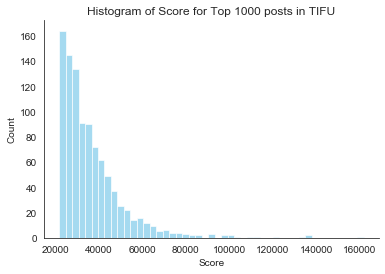

In [136]:
#Plotting the SCORE variable

sns.set_style('white');
sns.histplot(x='score',data=posts, color='skyblue');
plt.xlabel('Score');
plt.title('Histogram of Score for Top 1000 posts in TIFU');
sns.despine();

#this post is the highest voted lol - https://www.reddit.com/r/tifu/comments/a99fw9/tifu_by_buying_everyone_an_ancestrydna_kit_and/

In [57]:
posts['score'].describe() #min 21K

count       983.000000
mean      36589.368260
std       15383.961628
min       21847.000000
25%       26499.500000
50%       32519.000000
75%       41604.000000
max      161832.000000
Name: score, dtype: float64

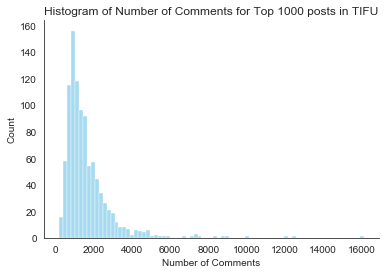

In [137]:
#Plotting the COMMENT COUNT variable

sns.set_style('white');
sns.histplot(x='num_comments',data=posts, color='skyblue');
plt.xlabel('Number of Comments');
plt.title('Histogram of Number of Comments for Top 1000 posts in TIFU');
sns.despine(); 

#the most commented post is not the same as the most voted - 
#posts[posts['num_comments'] > 15000]['url'] 
#https://www.reddit.com/r/tifu/comments/bpr2iy/tifu_i_have_officially_branded_myself_as_the/ 
#Not a funny story :( But both the posts are voted as FUOTM - fuck up of the months

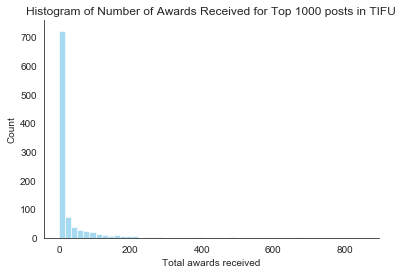

In [140]:
#Plotting the Number of Awards variable

sns.set_style('white');
sns.histplot(x='total_awards_received',data=posts, bins=50, color='skyblue');
plt.xlabel('Total awards received');
plt.title('Histogram of Number of Awards Received for Top 1000 posts in TIFU');
sns.despine(); 

#So most posts receive very less

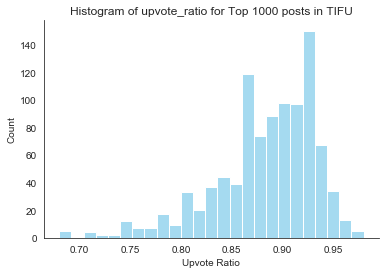

In [141]:
#Plotting the Upvote Ratio variable

sns.set_style('white');
sns.histplot(x='upvote_ratio',data=posts, color='skyblue');
plt.xlabel('Upvote Ratio');
plt.title('Histogram of upvote_ratio for Top 1000 posts in TIFU');
sns.despine(); 

#Nothing out of the norm, all top posts have good upvote_ratio (>70%). So this variable is not that interesting. 

With the histograms out of the way, I want to plot some counts by the categorical variables - flair, over18, and spoiler.

In [69]:
#1. Flair
posts['flair'].value_counts()

S                       520
M                       332
L                        71
FUOTW                    24
XL                       12
Fuck-Up of the Year       6
FUOTM                     4
mod post                  1
🐶🌭🌭🌭                      1
FUOTW (10/21/16)          1
FUOTW (11/12/17)          1
oh god why                1
Sponsored by Dole™        1
FUOTW (10/25/15)          1
FUOTW 02/01/15            1
Update                    1
FUOTW (02/26/16)          1
touche                    1
Butt                      1
FUOTW (05/10/15)          1
Fuck Up of the Month      1
Name: flair, dtype: int64

In [71]:
# Grouping all the FUOTW/M into one flair - easy way to do this for now is to just wildcard on F since no other flairs have it
cnt=0
for post in posts['flair']:
    if 'F' in post:
        cnt+=1
        
print(cnt) #41 adds up

41


In [75]:
posts['new_flair'] = posts['flair'].replace(['FUOTW','Fuck-Up of the Year','FUOTM','FUOTW (10/21/16)','FUOTW (11/12/17)','FUOTW (10/25/15)','FUOTW 02/01/15','FUOTW (02/26/16)','FUOTW (05/10/15)','Fuck Up of the Month'],'Special FU')

In [77]:
# Replacing others as others since the counts are too low
posts['new_flair'] = posts['new_flair'].replace(['🐶🌭🌭🌭','Butt','touche','Update','Sponsored by Dole™','oh god why','mod post'],'Other FUs')

In [78]:
posts['new_flair'].value_counts() #looks good now

S             520
M             332
L              71
Special FU     41
XL             12
Other FUs       7
Name: new_flair, dtype: int64

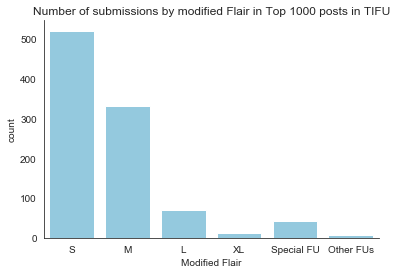

In [143]:
# Plotting the counts
sns.set_style('white');
sns.countplot(x='new_flair', data=posts, color = 'skyblue',order = ['S','M','L','XL','Special FU','Other FUs']);
sns.despine();
plt.xlabel('Modified Flair');
plt.title('Number of submissions by modified Flair in Top 1000 posts in TIFU');

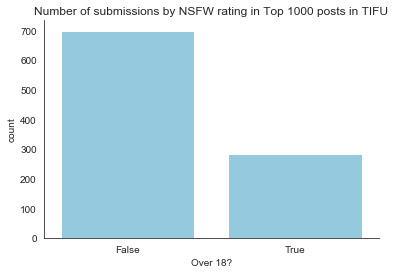

In [144]:
#2. Over 18
sns.set_style('white');
sns.countplot(x='over18', data=posts, color = 'skyblue');
sns.despine();
plt.xlabel('Over 18?');
plt.title('Number of submissions by NSFW rating in Top 1000 posts in TIFU');

#Around 1/3rd of the posts are NSFW

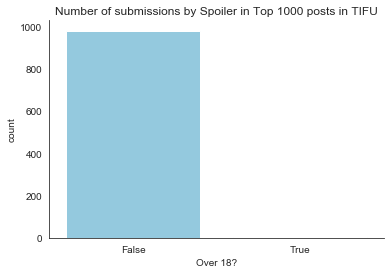

In [98]:
#3. Spoiler [Not useful]
sns.set_style('white');
sns.countplot(x='spoiler', data=posts, color = 'skyblue');
sns.despine();
plt.xlabel('Over 18?');
plt.title('Number of submissions by Spoiler in Top 1000 posts in TIFU');

#No spoilers, so dropping this column

## Bivariate and multi variate plots

I am curious to see how the 'score'/'num of comments' variables differ by flair and over18. Not including 'awards received' and 'upvote ratio' since it was pretty standard for all records.

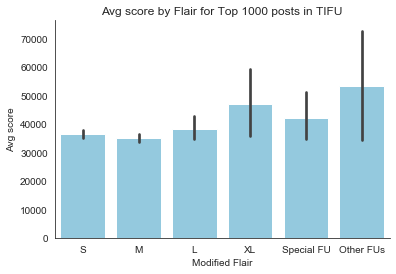

In [146]:
# By flair - avg score
sns.barplot(data=posts,x='new_flair',y='score',color='skyblue', order = ['S','M','L','XL','Special FU','Other FUs']);
plt.xlabel('Modified Flair');
plt.ylabel('Avg score');
plt.title('Avg score by Flair for Top 1000 posts in TIFU');
sns.despine();

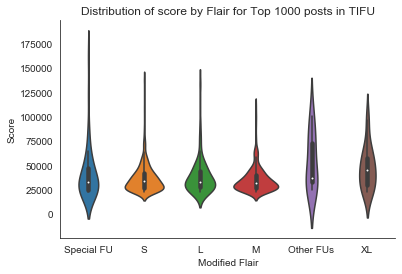

In [155]:
# A violin plot might be good to visualize the same
sns.violinplot(x='new_flair',y='score',data=posts);
plt.xlabel('Modified Flair');
plt.ylabel('Score');
plt.title('Distribution of score by Flair for Top 1000 posts in TIFU');
sns.despine();

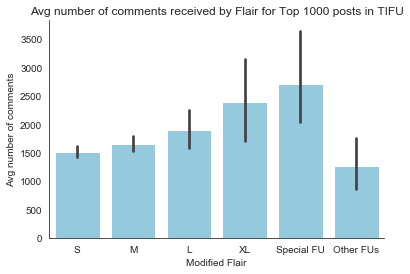

In [147]:
# By flair - Number of Comments
sns.barplot(data=posts,x='new_flair',y='num_comments',color='skyblue', order = ['S','M','L','XL','Special FU','Other FUs']);
sns.despine();
plt.xlabel('Modified Flair');
plt.ylabel('Avg number of comments');
plt.title('Avg number of comments received by Flair for Top 1000 posts in TIFU');

# So the special Fuck Ups get a lot of attention. Well deserved.

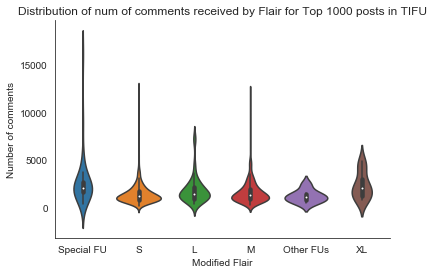

In [156]:
# A violin plot might be good to visualize the same
sns.violinplot(x='new_flair',y='num_comments',data=posts);
plt.xlabel('Modified Flair');
plt.ylabel('Number of comments');
plt.title('Distribution of num of comments received by Flair for Top 1000 posts in TIFU');
sns.despine();

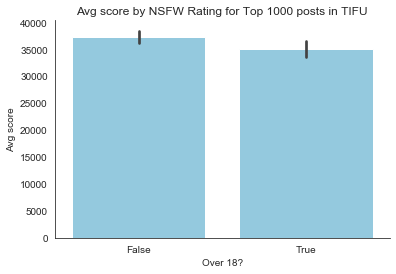

In [149]:
# By over 18 - avg score
sns.barplot(data=posts,x='over18',y='score',color='skyblue');
sns.despine();
plt.xlabel('Over 18?');
plt.ylabel('Avg score');
plt.title('Avg score by NSFW Rating for Top 1000 posts in TIFU');

#no big difference

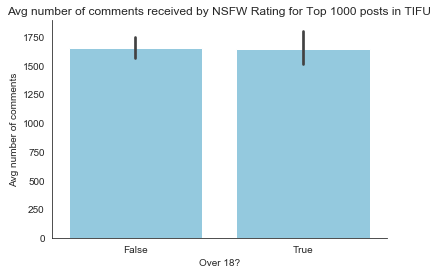

In [150]:
# By over 18 - comments received
sns.barplot(data=posts,x='over18',y='num_comments',color='skyblue');
sns.despine();
plt.xlabel('Over 18?');
plt.ylabel('Avg number of comments');
plt.title('Avg number of comments received by NSFW Rating for Top 1000 posts in TIFU');

#no big difference again

What's the relation between score and num of comments? 

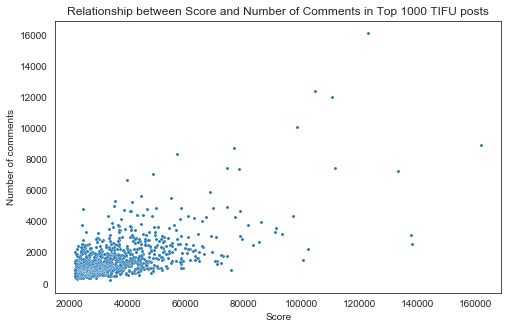

In [123]:
plt.figure(figsize=(8,5));
sns.scatterplot(data=posts,x='score',y='num_comments',s=10);
plt.xlabel('Score');
plt.ylabel('Number of comments');
plt.title('Relationship between Score and Number of Comments in Top 1000 TIFU posts');

#Clearly a positive relationship

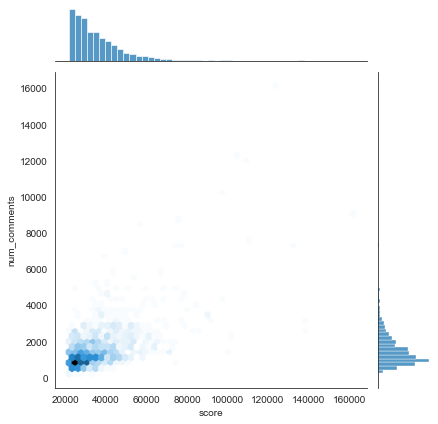

In [151]:
#Another variant of that
sns.jointplot(data=posts,x='score',y='num_comments',kind='hex');

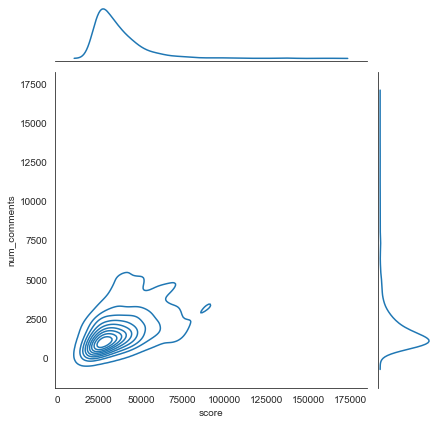

In [152]:
#Another variant of that
sns.jointplot(data=posts,x='score',y='num_comments',kind='kde');

Is there anything meaningful when it comes to the date/time the posts were posted?

In [159]:
import datetime as dt

#creating a date column without the timestamp
posts['date'] = posts['time'].dt.date
posts.head(1)

,id,title,author,total_awards_received,flair,url,score,upvote_ratio,num_comments,body,over18,time,new_flair,date
0,a99fw9,TIFU by buying everyone an AncestryDNA kit and...,Snorkels721,71,FUOTM,https://www.reddit.com/r/tifu/comments/a99fw9/...,161832,0.94,8946,"Earlier this year, AncestryDNA had a sale on t...",False,2018-12-25 01:28:35,Special FU,2018-12-25


In [161]:
count_by_date = posts['date'].value_counts()
print(len(count_by_date)) #716 dates

716


In [169]:
count_by_date #Aug 15th 2020 has the highest count

2020-08-15    4
2019-08-03    3
2019-03-22    3
2020-09-06    3
2019-05-17    3
             ..
2017-08-14    1
2019-09-29    1
2018-12-10    1
2020-07-20    1
2020-10-23    1
Name: date, Length: 716, dtype: int64

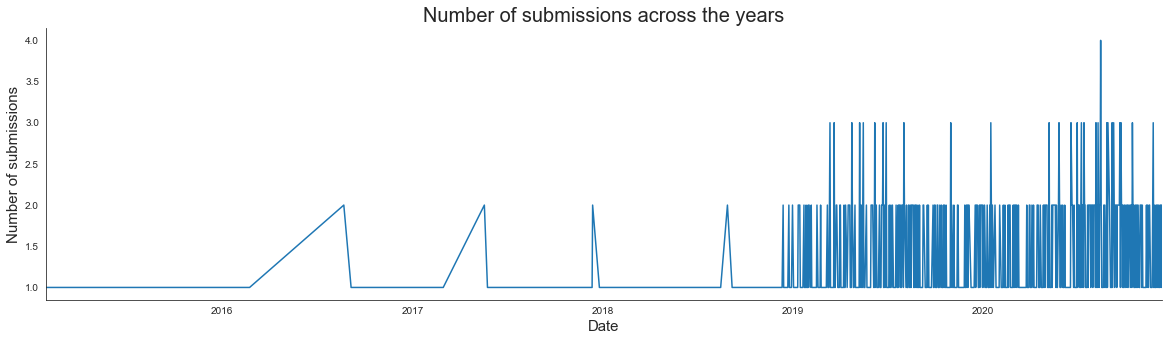

In [175]:
plt.figure(figsize=(20,5));
count_by_date.plot();
plt.xlabel('Date',fontsize=15);
plt.ylabel('Number of submissions',fontsize=15);
plt.title('Number of submissions across the years',fontsize=20);
sns.despine();

#Most top posts in 2019 and 2020. Even though the sub was created in Mar 4, 2012 so maybe more people joined recently?

## Exploring the body text to create a word cloud maybe?

In [176]:
pip install wordcloud

     |████████████████████████████████| 225kB 5.8MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_7_x86_64.whl size=157837 sha256=d138196fe044275a663a4ff82cfece33493117a8777589a279eb8b801c5c5062
  Stored in directory: /Users/apoorvadshenoy/Library/Caches/pip/wheels/bf/18/33/c6d0e1bb532e0587da731a02d990e62c483c8e49741e0c4bf3
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [177]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [179]:
description = " ".join(desc for desc in posts.body)
#this contains all the total descriptions. Confirmed by looking at first and last post.

'Earlier this year, AncestryDNA had a sale on their kit. I thought it would be a great gift idea so I bought 6 of them for Christmas presents. Today my family got together to exchange presents for our Christmas Eve tradition, and I gave my mom, dad, brother, and 2 sisters each a kit. \n\nAs soon as everyone opened their gift at the same time, my mom started freaking out. She told us how she didn’t want us taking them because they had unsafe chemicals. We explained to her how there were actually no chemicals, but we could tell she was still flustered. Later she started trying to convince us that only one of us kids need to take it since we will all have the same results and to resell extra kits to save money. \n\nFast forward: Our parents have been fighting upstairs for the past hour, and we are downstairs trying to figure out who has a different dad. \n\nTL;DR I bought everyone in my family AncestryDNA kit for Christmas. My mom started freaking. Now our parents are fighting and my dad 

In [185]:
cnt=0
for word in description.split():
    cnt+=1
print('Total word count: ', cnt)

Total word count:  501371


In [180]:
posts.head(1)

,id,title,author,total_awards_received,flair,url,score,upvote_ratio,num_comments,body,over18,time,new_flair,date
0,a99fw9,TIFU by buying everyone an AncestryDNA kit and...,Snorkels721,71,FUOTM,https://www.reddit.com/r/tifu/comments/a99fw9/...,161832,0.94,8946,"Earlier this year, AncestryDNA had a sale on t...",False,2018-12-25 01:28:35,Special FU,2018-12-25


In [182]:
posts.tail(1)

,id,title,author,total_awards_received,flair,url,score,upvote_ratio,num_comments,body,over18,time,new_flair,date
993,6pvbv9,TIFU by having a really high pain tolerance.,Abasaken,0,S,https://www.reddit.com/r/tifu/comments/6pvbv9/...,21847,0.87,2063,So bonus points because this actually happened...,False,2017-07-27 15:34:09,S,2017-07-27


In [184]:
?WordCloud #view the function in detail

In [188]:
wordcloud_desc = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=502000).generate(description)

In [191]:
wordcloud_desc

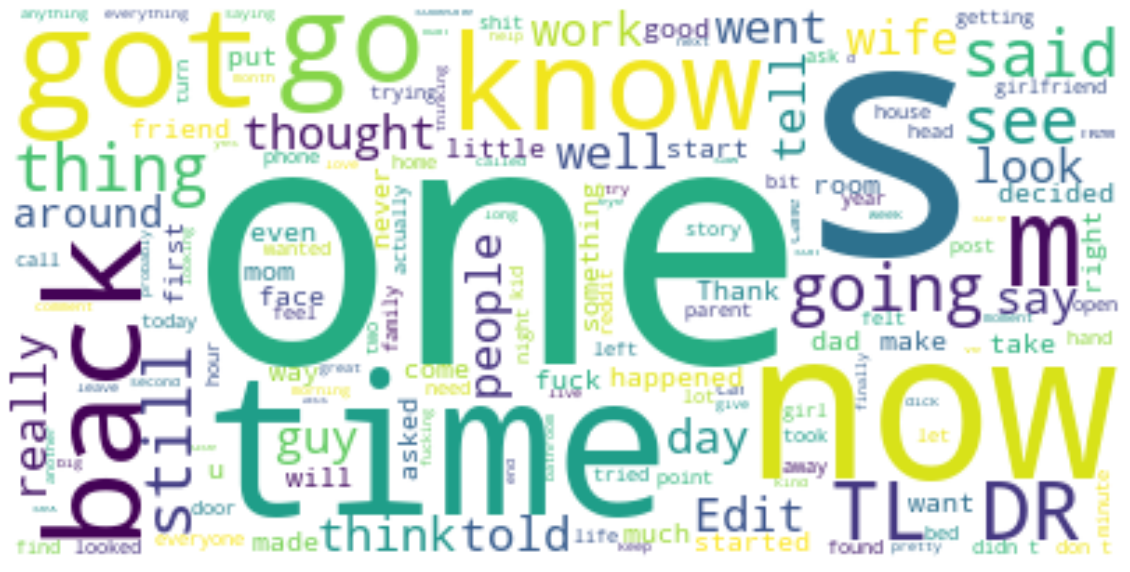

In [192]:
#How to actually display it?
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_desc, interpolation='bilinear')
plt.axis("off")
plt.show() #woohoo

# Conclusion

In this analysis, I learnt how to use the PRAW to collect data about the top posts in the TIFU subreddit and use that data to plot some basic charts understanding how score, number of comments etc. look for these top posts. We can extend this to any other subreddit as well.

I also recently heard about plotly to make interactive charts. Definitely going to use that next time!